In [13]:
import json
import csv
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.initializers import GlorotUniform

from sklearn.model_selection import train_test_split
import unittest
from tensorflow.keras.models import load_model, model_from_json
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
with open('daytest.json') as json_file:
    data = json.load(json_file)

# Convert JSON data to DataFrame
df = pd.DataFrame(data)

# Convert all headers to lowercase
df.columns = [col.lower() for col in df.columns]

# Split the timestamp column into date and time
df[['date', 'time']] = df['timestamp'].astype(str).str.split(' ', expand=True)

# Format the time column to HourMinute format
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.strftime('%H%M')

# Create new columns for wind direction and wind speed
df['wind_direction'] = df['ambientweatherwinddirection']
df['wind_speed'] = df['ambientweatherwindspeed']

# Sort the DataFrame by timestamp
df = df.sort_values(by='timestamp')

# Add a column for 5min_ahead which is the ambientweatherlightlux value 5 minutes ahead
df['5min_ahead'] = df['ambientweatherlightlux'].shift(-5)

# Drop rows with NaN values in the 5min_ahead column
df.dropna(subset=['5min_ahead'], inplace=True)

# Display the DataFrame to verify the changes
print("DataFrame after processing:")
print(df.head())

# Save the DataFrame back to a JSON file
df.to_json('daytest_processed.json', orient='records', lines=True)

# Save the DataFrame to a CSV file
df.to_csv('daytest_processed.csv', index=False)

# Display the DataFrame to verify the changes
print("DataFrame saved to CSV:")


In [ ]:
df1 = pd.read_csv('data_16_17.csv')
df2 = pd.read_csv('daytest_processed.csv')

# Prepare features and target variable for both datasets
features = ['temperature_c', 'humidity', 'pressure', 'ambientweatherwindspeed', 'ambientweatherwinddirection', 'pressure', 'ambientweatheruv', 'time']

X_num1 = df1[features].values
y1 = df1['5min_ahead'].values.reshape(-1, 1)  # Only use the 5min_ahead column as the target

X_num2 = df2[features].values
y2 = df2['5min_ahead'].values.reshape(-1, 1)  # Only use the 5min_ahead column as the target

print("y1 shape: ", y1.shape)
print("y2 shape: ", y2.shape)

# Create sequences
def create_sequences(X_num, y, seq_length):
    X_num_seq, y_seq = [], []
    for i in range(len(X_num) - seq_length):
        X_num_seq.append(X_num[i:i+seq_length])
        y_seq.append(y[i+seq_length-1])
    return np.array(X_num_seq).astype(np.float32), np.array(y_seq).astype(np.float32)

sequence_length = 5

# Create sequences for both datasets
X_seq1, y_seq1 = create_sequences(X_num1, y1, sequence_length)
X_seq2, y_seq2 = create_sequences(X_num2, y2, sequence_length)

print("X_seq1 shape: ", X_seq1.shape)
print("y_seq1 shape: ", y_seq1.shape)
print("X_seq2 shape: ", X_seq2.shape)
print("y_seq2 shape: ", y_seq2.shape)

c:\Users\allen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
34/34 - 3s - 102ms/step - loss: 0.1333 - val_loss: 0.0420
Epoch 2/50
34/34 - 0s - 5ms/step - loss: 0.0223 - val_loss: 0.0126
Epoch 3/50
34/34 - 0s - 5ms/step - loss: 0.0139 - val_loss: 0.0102
Epoch 4/50
34/34 - 0s - 5ms/step - loss: 0.0135 - val_loss: 0.0098
Epoch 5/50
34/34 - 0s - 6ms/step - loss: 0.0127 - val_loss: 0.0105
Epoch 6/50
34/34 - 0s - 6ms/step - loss: 0.0130 - val_loss: 0.0092
Epoch 7/50
34/34 - 0s - 6ms/step - loss: 0.0123 - val_loss: 0.0098
Epoch 8/50
34/34 - 0s - 7ms/step - loss: 0.0122 - val_loss: 0.0089
Epoch 9/50
34/34 - 0s - 9ms/step - loss: 0.0118 - val_loss: 0.0084
Epoch 10/50
34/34 - 0s - 6ms/step - loss: 0.0115 - val_loss: 0.0086
Epoch 11/50
34/34 - 0s - 6ms/step - loss: 0.0110 - val_loss: 0.0084
Epoch 12/50
34/34 - 0s - 6ms/step - loss: 0.0109 - val_loss: 0.0080
Epoch 13/50
34/34 - 0s - 6ms/step - loss: 0.0109 - val_loss: 0.0076
Epoch 14/50
34/34 - 0s - 5ms/step - loss: 0.0106 - val_loss: 0.0080
Epoch 15/50
34/34 - 0s - 5ms/step - loss: 0.0106 - val_

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.00713228]
 [0.00750192]
 [0.10731499]
 [0.812127  ]
 [0.06948395]
 [0.00765731]
 [0.2832989 ]
 [0.631022  ]
 [0.66927737]
 [0.3532003 ]
 [0.13437524]
 [0.54802126]
 [0.35527745]
 [0.04625562]
 [0.17573725]
 [0.65987366]
 [0.49089316]
 [0.61526304]
 [0.4194214 ]
 [0.13074154]
 [0.31180128]
 [0.17683491]
 [0.6219014 ]
 [0.6439068 ]
 [0.3294917 ]
 [0.64158916]
 [0.5800898 ]
 [0.00452432]
 [0.15895377]
 [0.6308161 ]
 [0.003263  ]
 [0.06699071]
 [0.60338384]
 [0.08634876]
 [0.10970992]
 [0.1151211 ]
 [0.5565102 ]
 [0.5036306 ]
 [0.76120955]
 [0.7925626 ]
 [0.6355938 ]
 [0.04046712]
 [0.6933251 ]
 [0.5137859 ]
 [0.00788255]
 [0.00099967]
 [0.28498015]
 [0.6795277 ]
 [0.45405298]
 [0.19605756]
 [0.6838713 ]
 [0.5815427 ]
 [0.16943751]
 [0.3802094 ]
 [0.43625638]
 [0.63730437]
 [0.57527745]
 [0.28300378]
 [0.8476012 ]
 [0.6248556 ]
 [0.42257005]
 [0.31823784]
 [0.77444255]
 [0.30756587]
 [0.5879596 ]
 [0.11724195]
 [0.6379843 ]
 [0.17347561]
 [0.125420

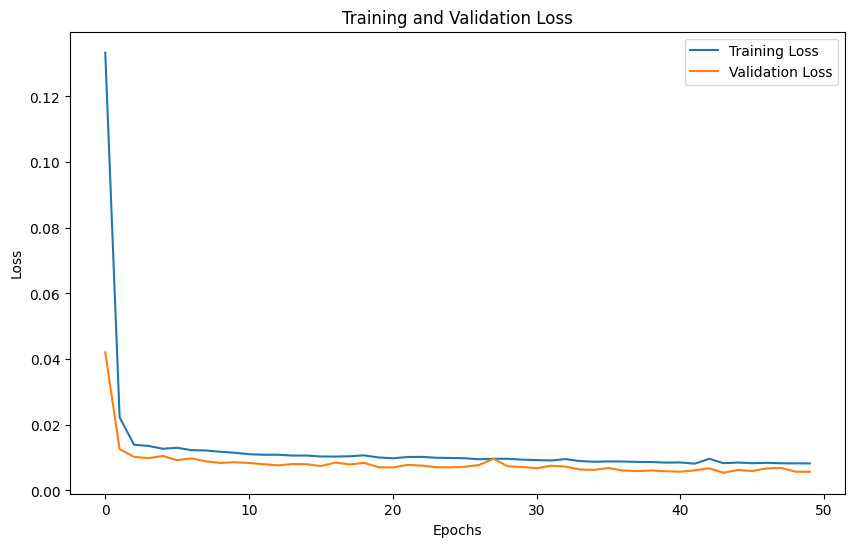

In [17]:
X_seq1, y_seq1 = create_sequences(X_num1, y1, sequence_length)
X_seq2, y_seq2 = create_sequences(X_num2, y2, sequence_length)

# Concatenate the sequences from both datasets
X_seq = np.concatenate((X_seq1, X_seq2), axis=0)
y_seq = np.concatenate((y_seq1, y_seq2), axis=0)

# Scale the features and target data separately
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X_seq.reshape(-1, X_seq.shape[-1])).reshape(X_seq.shape)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y_seq)
scaler_params = {
    'min': scaler_y.min_.tolist(),
    'scale': scaler_y.scale_.tolist(),
    'data_min': scaler_y.data_min_.tolist(),
    'data_max': scaler_y.data_max_.tolist(),
    'data_range': scaler_y.data_range_.tolist()
}
scaler_x_params = {
    'min': scaler_X.min_.tolist(),
    'scale': scaler_X.scale_.tolist(),
    'data_min': scaler_X.data_min_.tolist(),
    'data_max': scaler_X.data_max_.tolist(),
    'data_range': scaler_X.data_range_.tolist()
}

with open('scaler_y_params.json', 'w') as f:
    json.dump(scaler_params, f)

with open('scaler_x_params.json', 'w') as f:
    json.dump(scaler_x_params, f)
# Extract the time values for the test set
time_values1 = df1['time'].values[sequence_length:]
time_values2 = df2['time'].values[sequence_length:]
time_values = np.concatenate((time_values1, time_values2), axis=0)

# Split the data into 70% training, 15% validation, and 15% testing with shuffling
X_train, X_temp, y_train, y_temp, time_train, time_temp = train_test_split(X_scaled, y_scaled, time_values, test_size=0.3, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test, time_val, time_test = train_test_split(X_temp, y_temp, time_temp, test_size=0.5, random_state=42, shuffle=True)

# Build LSTM model
n_timesteps, n_features = X_train.shape[1], X_train.shape[2]
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(n_timesteps, n_features), kernel_initializer=GlorotUniform()))
model.add(LSTM(32, activation='relu', kernel_initializer=GlorotUniform()))
model.add(Dense(64, activation='relu', kernel_initializer=GlorotUniform()))
model.add(Dense(1, activation='linear', kernel_initializer=GlorotUniform()))  # Output layer for 1 target
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=2, shuffle=True)

model.save("lstm_model_5min.h5")
model.save("LSTM_MODEL_5MIN.keras")
model_json = model.to_json()
with open("LSTM_MODEL_5MIN.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights
model.save_weights("LSTM_MODEL_5MIN.weights.h5")
# Make predictions
y_pred_scaled = model.predict(X_test)

# Inverse transform to get the actual values
y_pred = scaler_y.inverse_transform(y_pred_scaled)
print(y_pred_scaled)
y_test = scaler_y.inverse_transform(y_test)

# Create results directory if it doesn't exist
predictions = []
actuals = []
times = []
print("y pred shape: ", y_pred.shape)
print("y test shape: ", y_test.shape)
print("time shape: ", time_values.shape)
print("time test: ", time_values.shape)

for i in range(len(y_test)):
    predictions.append(y_pred[i])
    actuals.append(y_test[i])
    times.append(time_test[i])

# Convert to numpy arrays for sorting
predictions = np.array(predictions)
actuals = np.array(actuals)
times = np.array(times)

# Sort the arrays based on the time values
sorted_indices = np.argsort(times)
predictions = predictions[sorted_indices]
actuals = actuals[sorted_indices]
times = times[sorted_indices]

# Convert time values to string format
times_str = [str(time) for time in times]
# Create results directory if it doesn't exist
os.makedirs('results', exist_ok=True)

# Plot and save the predicted vs actual values for 5 minutes ahead
plt.figure(figsize=(10, 6))
plt.plot(times_str, actuals, label='Actual 5min Ahead')
plt.plot(times_str, predictions, label='Predicted 5min Ahead')
plt.xlabel('Time')
plt.ylabel('Ambient Weather Light Lux')
plt.title('Actual vs Predicted 5min Ahead')
plt.legend()

# Set x-axis ticks and labels every 10 minutes
xticks = np.arange(0, len(times_str), 10)
xtick_labels = [times_str[j] for j in xticks]
plt.xticks(xticks, xtick_labels, rotation=45)

plt.savefig('results/actual_vs_predicted_5min_ahead.png')
plt.close()

# Plot training and validation loss to check for overfitting
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('results/training_validation_loss.png')
plt.show()

In [15]:
with open("LSTM_MODEL_5MIN.json", "r") as json_file:
    model_json = json_file.read()
model = model_from_json(model_json)

# Load the model weights
model.load_weights("LSTM_MODEL_5MIN.weights.h5")

# Save the complete model (architecture + weights) to an HDF5 file
model.save("LSTM_MODEL_5MIN_complete.h5")

model.load_weights("LSTM_MODEL_5MIN.weights.h5")


model.save("new_lstm_model_complete.h5")



c:\Users\allen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
newDF = pd.read_csv('data_1120.csv')

features = ['temperature_c', 'humidity', 'pressure', 'wind_speed', 'wind_direction','pressure','ambientweatheruv', 'time']
X_num2 = newDF[features].values
y2 = newDF[[f'{minutes}min_ahead' for minutes in [5]]].values

scaler_X = MinMaxScaler()
X_scaled2 = scaler_X.fit_transform(X_num2)

scaler_y = MinMaxScaler()
y_scaled2 = scaler_y.fit_transform(y2)
# Create sequences
def create_sequences(X_num, y, seq_length):
    X_num_seq, y_seq = [], []
    for i in range(len(X_num) - seq_length):
        X_num_seq.append(X_num[i:i+seq_length])
        y_seq.append(y[i+seq_length-1])
    return np.array(X_num_seq).astype(np.float32), np.array(y_seq).astype(np.float32)


sequence_length = 5
X_seq2, y_seq2 = create_sequences(X_scaled2, y_scaled2, sequence_length)
print("x seq", X_seq2)

time_values = newDF['time'].values[sequence_length:]

y_pred_scaled = model.predict(X_seq2)

# Inverse transform to get the actual values
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_seq2 = scaler_y.inverse_transform(y_seq2)
y_test = y_seq2

# Create results directory if it doesn't exist
predictions = []
actuals = []
times = []

for i in range(len(y_test)):
    predictions.append(y_pred[i])
    actuals.append(y_test[i])
    times.append(time_values[i])

# Convert to numpy arrays for sorting
predictions = np.array(predictions)
actuals = np.array(actuals)
times = np.array(times)

# Sort the arrays based on the time values
sorted_indices = np.argsort(times)
predictions = predictions[sorted_indices]
actuals = actuals[sorted_indices]
times = times[sorted_indices]

# Convert time values to string format
times_str = [str(time) for time in times]

# Create results directory if it doesn't exist
os.makedirs('results', exist_ok=True)

# Plot and save the predicted vs actual values for 5, 15, 30, and 60 minutes ahead
for i, minutes in enumerate([5]):
    plt.figure(figsize=(10, 6))
    plt.plot(times_str, actuals[:, i], label=f'Actual {minutes}min Ahead')
    plt.plot(times_str, predictions[:, i], label=f'Predicted {minutes}min Ahead')
    plt.xlabel('Time')
    plt.ylabel('Ambient Weather Light Lux')
    plt.title(f'Actual vs Predicted {minutes}min Ahead of 11-20 data')
    plt.legend()
    
    # Set x-axis ticks and labels every 10 minutes
    xticks = np.arange(0, len(times_str), 10)
    xtick_labels = [times_str[j] for j in xticks]
    plt.xticks(xticks, xtick_labels, rotation=45)
    
    plt.savefig(f'results/1120_test_actual_vs_predicted_{minutes}min_ahead.png')
    plt.close()

print("All plots saved.")


In [ ]:

with open('1120data.json') as json_file:
    data = json.load(json_file)

# Convert JSON data to DataFrame
df = pd.DataFrame(data)

# Split the timestamp column into date and time (only minutes)
df['date'] = pd.to_datetime(df['timestamp']).dt.date
df['time'] = pd.to_datetime(df['timestamp']).dt.strftime('%H%M')

# Display the DataFrame
df.head()

# Reformat Timestamp Column
# Split the timestamp column into date and time (only minutes)
df.sort_values(by='time', inplace=True)

df['5min_ahead'] = df['ambientweatherlightlux'].shift(-5)
df['15min_ahead'] = df['ambientweatherlightlux'].shift(-15)
df['30min_ahead'] = df['ambientweatherlightlux'].shift(-30)
df['60min_ahead'] = df['ambientweatherlightlux'].shift(-60)

# Drop the original timestamp column
df.drop(columns=['timestamp'], inplace=True)
df.dropna(inplace=True)

# Display the DataFrame
df.head()

# Save to CSV
# Save the transformed data to a CSV file 'data_16_17.csv'
df.to_csv('data_1120.csv', index=False)


In [ ]:
from keras.utils import plot_model
from keras.applications.resnet50 import ResNet50
import numpy as np


model_pprint = load_model('LSTM_MODEL_5MIN.keras')
plot_model(model_pprint, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
